---
jupyter: python3
format:
  html:
    theme : yeti
    toc: true
    code-fold: true #enable code dropdown for html output
    toc-title: Contents
execute:
    echo: false  #True=show code in output, false=don't
---

# 01. Introduction to Support Vector Machine(SVM)
A SVM is a supervised machine learning algorithm used for both classification and regression.we will focus on the classification in this section. The objective of SVM algorithms is to detect a hyperplane that distinguishes between classes in an N-dimensional space. Hyperplane dimensions are determined by the number of features. When there are just two input features, the hyperplane is just a line. Hyperplanes become 2-D planes if there are three input features. As the number of features increases, it becomes more difficult to imagine. 

In this section, we will use SVM to classify the input text and determine the tone of each input text. The data set we are going to use consists of 2500 tweets that contain the word that relate to the word "weed", "cannabins" and "Marijuana" ect.. and tone which represents the sentiments of each tweet.

We will go through the 7 steps and I will write description for each step. In the end, we will get a SVM model that can help us to classify the sentiments of the input text. Therefore, based on the sentiments we can know if the people like Marijuana or not.


# 02. Data pre-processing

It is an essential step in any data mining process. Basically, it involves transforming raw data into a format that can be understood by NLP models. Real-world data is sometimes inaccurate and it is also frequently inconsistent and incomplete. Pre processing data is a good way to solve these issues. This will help in getting better results through the classification algorithms.


<li> Data Cleaning</li>
By removing the blank rows in data and changing all the text to lower case. typecast some data into desired type, unify data format, remove some unrealistic number (e.g. negative number in the age column), remove outliers etc.

All of above process can be applied on the text/numeric input data and those will help us improve the result of classification.


In [35]:
import numpy as np
import random
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support,classification_report,confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
from nltk.tokenize import word_tokenize      
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer        
from nltk.stem import WordNetLemmatizer 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import random
from TextFeatureSelection import TextFeatureSelection



In [36]:
df=pd.read_csv('../clean_tweet_tone_df.csv')
df=df.drop('Unnamed: 0',axis=1)
text=df[{'clean_text','tone'}]
text['tone']=text['tone'].apply(lambda x: 0 if x == 0 else (1 if x>0 else -1) )
text

,clean_text,tone
0,medical pain taxes spent putting people jail s...,-1
1,good way clean follower list app called see fo...,1
2,legalize marijuana remove barriers desantis p...,-1
3,rt chem d ig,0
4,weed bro thats straight losses miami pats lon...,-1
...,...,...
2495,caught someone smoking weed pen class hahahaha...,1
2496,research shows black brown people disproporti...,0
2497,smoke weed responsible mentally sick sober ser...,-1
2498,people call weed cannabis,0


The graph above is the input text data. Each line represents a sentence and we have 2500 sentence as input text. Also, we have labelled the tone of each text. -1 represents negatives 
;0 represents neutrals 
;1 represents positives. Here is the count of each type of tone



In [37]:
text['tone'].value_counts()

 1    1056
 0     746
-1     698
Name: tone, dtype: int64

<li>Word Tokenization</li>
This is a process of breaking a text into words, phrases, symbols, or other meaningful elements called tokens. The list of tokens as input can be "read" by the machine. We will use the NLTK Library which has word_tokenize to easily break the input text into word list.


<li>Word Stemming/Lemmatization</li>
Stemming is a process that stems or removes last few characters from a word, often leading to incorrect meanings and spelling. Lemmatization considers the context and converts the word to its meaningful base form


 For more details and codes, click the 'Data Cleaning' tab.

In [38]:
text['word_tokenize']= [word_tokenize(entry) for entry in text['clean_text']]
text


,clean_text,tone,word_tokenize
0,medical pain taxes spent putting people jail s...,-1,"[medical, pain, taxes, spent, putting, people,..."
1,good way clean follower list app called see fo...,1,"[good, way, clean, follower, list, app, called..."
2,legalize marijuana remove barriers desantis p...,-1,"[legalize, marijuana, remove, barriers, desant..."
3,rt chem d ig,0,"[rt, chem, d, ig]"
4,weed bro thats straight losses miami pats lon...,-1,"[weed, bro, thats, straight, losses, miami, pa..."
...,...,...,...
2495,caught someone smoking weed pen class hahahaha...,1,"[caught, someone, smoking, weed, pen, class, h..."
2496,research shows black brown people disproporti...,0,"[research, shows, black, brown, people, dispro..."
2497,smoke weed responsible mentally sick sober ser...,-1,"[smoke, weed, responsible, mentally, sick, sob..."
2498,people call weed cannabis,0,"[people, call, weed, cannabis]"


the table above, we added a column called word_tokenize and put the tokenized text in the column. 

In [39]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

test=[lemmatizer.lemmatize(w) for w in text['word_tokenize'][0]]
test

['medical',
 'pain',
 'tax',
 'spent',
 'putting',
 'people',
 'jail',
 'sin',
 'big',
 'pharma',
 'fear',
 'legal',
 'marijuana',
 'amp',
 'terrorism',
 'victim',
 'blocked',
 'u',
 'gover',
 'via']

The word list above is the first input text after lemmatization. I will apply the lemmatization to all the input text later.

<li> Text Vectorization </li>

Text Vectorization is the process of converting text into numerical representation. Here we are going to use Count Vectorizer from NLTK library to vectorize the text. It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.   




In [40]:

class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]



corpus=df['clean_text']
vectorizer = CountVectorizer(stop_words='english' ,lowercase=True)
X = vectorizer.fit_transform(corpus)

print(vectorizer.get_feature_names_out()[:50])
print(X.toarray()[:20])

print("the shape of the matrix is ",X.toarray().shape)

['aahn' 'aaron' 'ab' 'abc' 'ability' 'able' 'abolished' 'abolitionism'
 'abortion' 'abortions' 'abroad' 'absolute' 'absolutely' 'abt' 'abundance'
 'abuse' 'abusers' 'accept' 'acceptable' 'accepted' 'accepts' 'access'
 'accessory' 'accident' 'accomplished' 'according' 'account' 'accountant'
 'accounts' 'accretive' 'accumulate' 'accurately' 'accustomed' 'ace'
 'achieved' 'achievement' 'achievements' 'acid' 'acquiring' 'acquisition'
 'acre' 'acres' 'acro' 'act' 'acted' 'acting' 'action' 'actions' 'active'
 'activist']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the shape of the matrix is  (2500, 6345)


<li>Feature Selection</li>

we will use text feature selection from TextFeatureSelection library to help us choosing correct feature as input. It will reduce the dimensions of out input data so data complexity is reduced as well, so we can get better result.

In [41]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = SelectKBest(chi2, k=5100).fit_transform(X, text['tone'])
X.shape

(2500, 5100)

the size of our data becomes 2500 x 5100 and removes around 20% features (columns)

<li>Split Data </li>
We split the dataset into two parts. One part is used for train the model and another part is used for testing the model performance.

We are performing a train test split on our dataset. We are providing the test size as 0.20, that means our training sample contains 2000 training set and test sample contains 500 test set.


The word list represent all words from input text (only show first 20 words) and the matrix below is the count of word for each input text.

In [42]:
x_train,x_test,y_train,y_test=train_test_split(X,text['tone'],test_size=0.2)

print("X_train.shape",x_train.shape)
print("y_train.shape",y_train.shape)
print("X_test.shape",x_test.shape)
print("y_test.shape",y_test.shape)

X_train.shape (2000, 5100)
y_train.shape (2000,)
X_test.shape (500, 5100)
y_test.shape (500,)


# 03. Distribution of Class labels
Plotting the distribution of the class labels will help use to determine which kernel that we can use for the SVM model also what effect it might have on the classification algorithm results.

Text(0, 0.5, 'count')

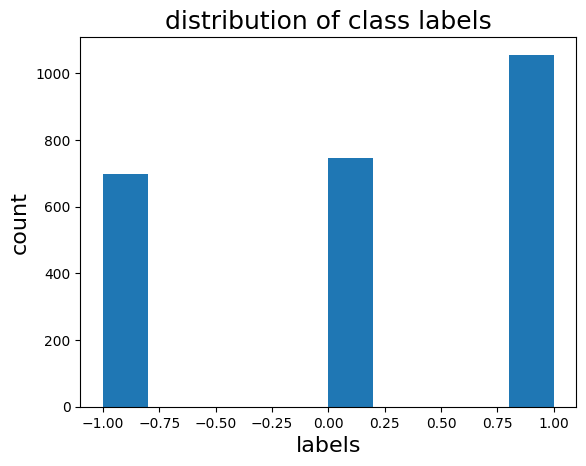

In [43]:

plt.hist(text['tone'])
plt.title("distribution of class labels",fontsize=18)
plt.xlabel("labels",fontsize=16)
plt.ylabel("count",fontsize=16)

It seems like the number of label "-1" and label "0" are less than label "1" and label "1" has the most large sample size. So, I think the result of label "1" will have highest accuracy due to the large sample size. And label "-1" and label "0" will have similar accuracy since they have similar sample size.

# 04. Baseline model for comparison

In this part. We will define a classification method called "random classifier" that randomly chooses the label between the classes and we will use the random selection as our predicted labels. So, the random classifier will give us the worse case for the given classification problem and we can use the result from the random classifier to compare the result from SVM model we are going to use later. 


Since we just do the random selection so how well the random classifier does depends on the number of classes, and the load balance between classes. 

In [44]:
def random_classifier(y_data):
    ypred=[]
    max_label=np.max(y_data); #print(max_label)
    for i in range(0,len(y_data)):
        ypred.append(random.choice(y_data))

    print("-----RANDOM CLASSIFIER-----")
    print("count of prediction:",Counter(ypred).values()) # counts the elements' frequency
    print("probability of prediction:",np.fromiter(Counter(ypred).values(), dtype=float)/len(y_data)) # counts the elements' frequency
    print("accuracy",accuracy_score(y_data, ypred))
    print("percision, recall, fscore,",precision_recall_fscore_support(y_data, ypred))



random_classifier(text['tone'])

-----RANDOM CLASSIFIER-----
count of prediction: dict_values([1032, 752, 716])
probability of prediction: [0.4128 0.3008 0.2864]
accuracy 0.3372
percision, recall, fscore, (array([0.27094972, 0.30053191, 0.40988372]), array([0.27793696, 0.30294906, 0.40056818]), array([0.27439887, 0.30173565, 0.40517241]), array([ 698,  746, 1056]))


Therefore, we can use the information above to compare the SVM model to see if the SVM will improve any.

# 05. Data Modelling (SVM Classification)
Now we can use our training set to train the model and use test set to see the performance.

In [100]:
clf = SVC(C=4,kernel="linear")
clf.fit(x_train,y_train)

yp_train = clf.predict(x_train)
yp_test = clf.predict(x_test)

In [101]:
con_mat_train = confusion_matrix(y_train,yp_train,labels=clf.classes_)
con_mat_test = confusion_matrix(y_test,yp_test,labels=clf.classes_)

In [102]:
df_result = classification_report(y_train,yp_train,output_dict=True)
df_result =pd.DataFrame(df_result).T
df_result

,precision,recall,f1-score,support
-1,1.000000,0.996546,0.998270,579.000
0,0.994941,1.000000,0.997464,590.000
1,0.998795,0.997593,0.998194,831.000
accuracy,0.998000,0.998000,0.998000,0.998
macro avg,0.997912,0.998046,0.997976,2000.000
weighted avg,0.998007,0.998000,0.998001,2000.000


The table above is classification report for the train data

In [103]:
df_result = classification_report(y_test,yp_test,output_dict=True)
df_result =pd.DataFrame(df_result).T
df_result

,precision,recall,f1-score,support
-1,0.728155,0.630252,0.675676,119.000
0,0.677725,0.916667,0.779292,156.000
1,0.887097,0.733333,0.802920,225.000
accuracy,0.766000,0.766000,0.766000,0.766
macro avg,0.764326,0.760084,0.752629,500.000
weighted avg,0.783945,0.766000,0.765264,500.000


The table above is classification report for the test data

Text(0.5, 1.0, 'confusion matrix for test data')

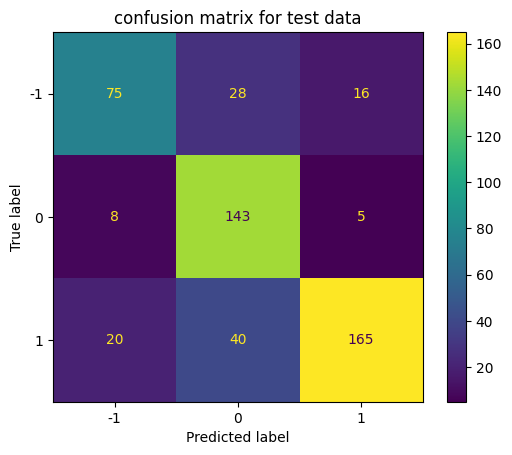

In [104]:
disp = ConfusionMatrixDisplay(confusion_matrix=con_mat_test,
                            display_labels=clf.classes_)
disp.plot()
plt.title("confusion matrix for test data")


As we can see, the precision is very high for the both train data and test data. Also, we can calculate the accuracy of our model from confusion matrix which is $\dfrac{75+143+165}{500} =0.766$. The accuracy is so mush higher than the one we got from random classifier. So, the SVM model can actually predicts the sentiments for input text.

# 06.Hyperparameter Optimization (Model tuning)

In training, hyperparameters are variables that control the process. During a Model training job, these configuration variables do not change. You can maximize its predictive accuracy by selecting optimized values for hyperparameter.

In this part, we will choose different values for the hyperparameters (C in SVM model)) and run the model with the chosen C then save its accuracy. Finally, plot the accuracy vs hyperparameter's value to find out the optimal model.

In [62]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score

test_results=[]
train_results=[]


for c in np.linspace(0.1,10,30):
    model = SVC(C=c,kernel="linear")
    model = model.fit(x_train,y_train)

    yp_train=model.predict(x_train)
    yp_test=model.predict(x_test)

    # print(y_pred.shape)
    test_results.append([c,accuracy_score(y_test, yp_test),recall_score(y_test, yp_test,average=None)])
    train_results.append([c,accuracy_score(y_train, yp_train),recall_score(y_train, yp_train,average=None)])

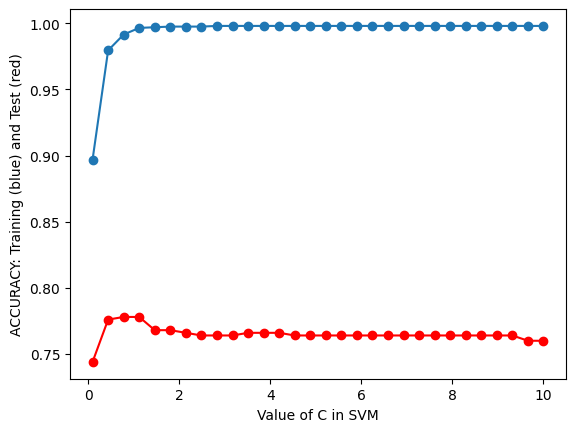

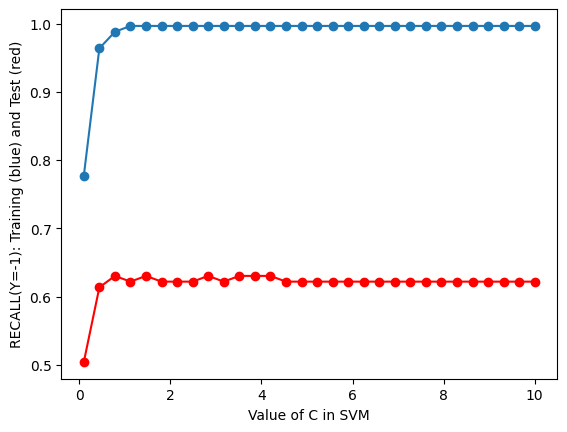

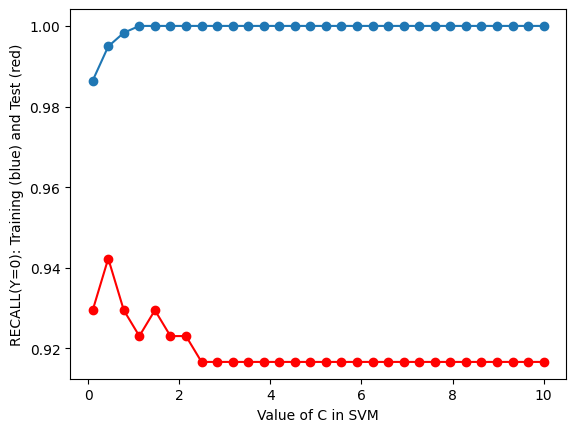

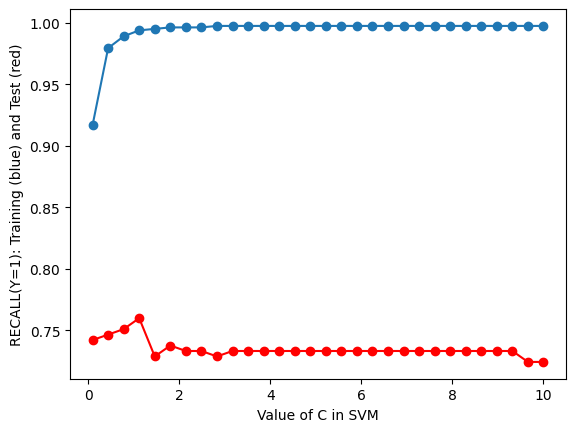

In [63]:

plt.plot(np.array(train_results)[:,0],np.array(train_results)[:,1],'-o')
plt.plot(np.array(test_results)[:,0],np.array(test_results)[:,1],'-o',c="red")
plt.xlabel("Value of C in SVM")
plt.ylabel("ACCURACY: Training (blue) and Test (red)")
plt.show()

plt.plot(np.array(train_results)[:,0],[y[0] for y in np.array(train_results)[:,2]],'-o')
plt.plot(np.array(test_results)[:,0],[y[0] for y in np.array(test_results)[:,2]],'-o',c="red")
plt.xlabel("Value of C in SVM")
plt.ylabel("RECALL(Y=-1): Training (blue) and Test (red)")
plt.show()

plt.plot(np.array(train_results)[:,0],[y[1] for y in np.array(train_results)[:,2]],'-o')
plt.plot(np.array(test_results)[:,0],[y[1] for y in np.array(test_results)[:,2]],'-o',c="red")
plt.xlabel("Value of C in SVM")
plt.ylabel("RECALL(Y=0): Training (blue) and Test (red)")
plt.show()

plt.plot(np.array(train_results)[:,0],[y[2] for y in np.array(train_results)[:,2]],'-o')
plt.plot(np.array(test_results)[:,0],[y[2] for y in np.array(test_results)[:,2]],'-o',c="red")
plt.xlabel("Value of C in SVM")
plt.ylabel("RECALL(Y=1): Training (blue) and Test (red)")
plt.show()


So based on the 4 graphs, I will choose C value from 0.35 to 0.5 as the best the model.

# 07. Optimal Model

I choose C = 0.8 for SVM model and let's the model result.

------TRAINING------
              precision    recall  f1-score   support
-1             0.996516  0.987910  0.992194   579.000
0              0.981667  0.998305  0.989916   590.000
1              0.996368  0.990373  0.993361   831.000
accuracy       0.992000  0.992000  0.992000     0.992
macro avg      0.991517  0.992196  0.991824  2000.000
weighted avg   0.992074  0.992000  0.992007  2000.000


Text(0.5, 1.0, 'confusion matrix for train data')

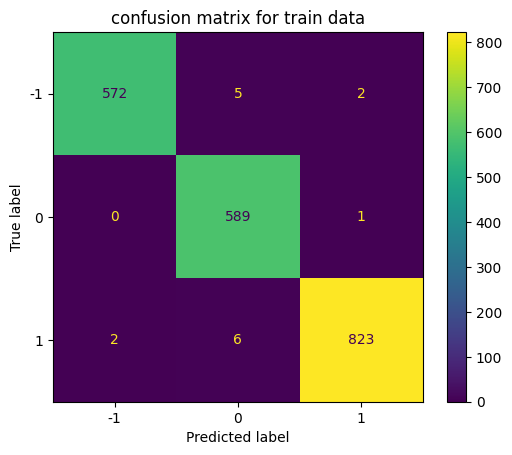

In [88]:
clf = SVC(C=0.8,kernel="linear")
clf.fit(x_train,y_train)

yp_train = clf.predict(x_train)
yp_test = clf.predict(x_test)

con_mat_train = confusion_matrix(y_train,yp_train,labels=clf.classes_)
con_mat_test = confusion_matrix(y_test,yp_test,labels=clf.classes_)




print("------TRAINING------")

df_result1 = classification_report(y_train,yp_train,output_dict=True)
df_result1 =pd.DataFrame(df_result1).T
print(df_result1)
disp = ConfusionMatrixDisplay(confusion_matrix=con_mat_train,
                            display_labels=clf.classes_)

disp.plot()
plt.title("confusion matrix for train data")





------TEST------
              precision    recall  f1-score  support
-1             0.765306  0.630252  0.691244   119.00
0              0.677570  0.929487  0.783784   156.00
1              0.904255  0.755556  0.823245   225.00
accuracy       0.780000  0.780000  0.780000     0.78
macro avg      0.782377  0.771765  0.766091   500.00
weighted avg   0.800460  0.780000  0.779517   500.00


Text(0.5, 1.0, 'confusion matrix for test data')

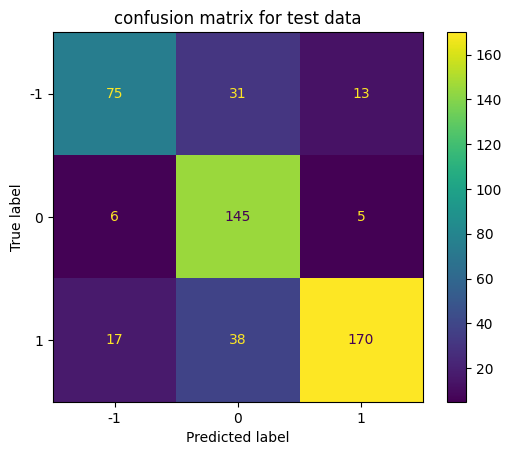

In [89]:
print("------TEST------")
df_result2 = classification_report(y_test,yp_test,output_dict=True)
df_result2 =pd.DataFrame(df_result2).T
print(df_result2)
disp = ConfusionMatrixDisplay(confusion_matrix=con_mat_test,
                            display_labels=clf.classes_)
disp.plot()
plt.title("confusion matrix for test data")

We can calculate the accuracy from confusion matrix of test data is $\frac{75+145+170}{500} = 0.78$. Comparing to the old one which is 0.766, we improve the accuracy by around 0.2. Besides, recall and f1-score increased as well.

# 08. Conclusion

From the last confusion matrix, we can see the true positive rate (recall) which represents the probability of predicting the tone is X (X can be one of "negative","positive","neural") given the tone of input text is X. So, we can get 3 true positive rate for each tone and they are P(X=1|X=1) = $0.756$, P(X=0|X=0) = $0.929$, P(X=-1|X=-1) = $0.63$. These numbers show that model will be more accurate in predicting the tone of neutral compared to the other two.


Also, the precision represents the quality of a positive prediction made by the model and we got 0.76 for "negative", 0.677 for "neutral" and "0.904 for "positive". So, prediction made by the model will have more correct labels in "positive".

# Reference

Code: https://github.com/anly501/anly-501-project-yanyanli0/tree/main/codes in 05-SVM file